<H1>Pandas redux</H1>
<br/>
Dr. Chris Teplovs<br/>
University of Michigan<br/>
School of Information<br/>
<p>
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.
</small>
</p>

This is a short introduction to pandas, geared mainly for new users. We are going to use it as a pandas refresher in SI 370, since you were introduced to pandas in SI 330. However, it's probably been a few months since you've used pandas on a regular basis, so it's normal to have forgotten some (most?) of this.

This guide comes directly from the [10 Minute Guide to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) on the Pandas official website. It was ported to a Jupyter notebook by [Binh](https://www.kaggle.com/code/btphan/10-minutes-to-pandas/notebook) to make the code more accessible.  We have edited Binh's work to bring it up to date with the current version of pandas, as well as fixing some minor stylistic issues.

You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

For this class, we're going to going to go through this notebook quickly.  We'll then spend the next few classes covering the topics introduced in this notebook in more detail.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
See the [Data Structure Intro section](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html). Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a numpy array, with a datetime index and labeled columns:

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates,
                  columns=['A', 'B', 'C', 'D'])
# alternatively, columns=list("ABCD")
df

,A,B,C,D
2013-01-01,0.876428,-0.908529,1.538796,-0.194098
2013-01-02,-0.878767,-1.119152,-1.242540,-0.700082
2013-01-03,-0.704478,-0.624410,0.798765,1.672570
2013-01-04,1.306753,0.945486,1.473001,-0.461826
2013-01-05,0.245298,-1.087827,2.174627,-1.223518
2013-01-06,-1.816905,0.051709,0.386117,-1.018577


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [6]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html):

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


# Viewing Data
See the [Basics section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)

See the top & bottom rows of the frame

In [8]:
df.head()

,A,B,C,D
2013-01-01,0.876428,-0.908529,1.538796,-0.194098
2013-01-02,-0.878767,-1.119152,-1.242540,-0.700082
2013-01-03,-0.704478,-0.624410,0.798765,1.672570
2013-01-04,1.306753,0.945486,1.473001,-0.461826
2013-01-05,0.245298,-1.087827,2.174627,-1.223518


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,1.306753,0.945486,1.473001,-0.461826
2013-01-05,0.245298,-1.087827,2.174627,-1.223518
2013-01-06,-1.816905,0.051709,0.386117,-1.018577


Display the index, columns, and the underlying numpy data

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[ 0.87642766, -0.90852901,  1.53879644, -0.19409804],
       [-0.8787669 , -1.11915225, -1.24253951, -0.70008164],
       [-0.70447832, -0.6244102 ,  0.79876546,  1.67257044],
       [ 1.30675323,  0.94548623,  1.47300121, -0.46182595],
       [ 0.24529824, -1.08782656,  2.17462672, -1.22351816],
       [-1.81690463,  0.05170917,  0.38611653, -1.018577  ]])

DataFrame.to_numpy() gives a NumPy representation of the underlying data.

For df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data:

In [13]:
df.to_numpy()

array([[ 0.87642766, -0.90852901,  1.53879644, -0.19409804],
       [-0.8787669 , -1.11915225, -1.24253951, -0.70008164],
       [-0.70447832, -0.6244102 ,  0.79876546,  1.67257044],
       [ 1.30675323,  0.94548623,  1.47300121, -0.46182595],
       [ 0.24529824, -1.08782656,  2.17462672, -1.22351816],
       [-1.81690463,  0.05170917,  0.38611653, -1.018577  ]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive:

In [14]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

Describe shows a quick statistic summary of your data

In [15]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.161945,-0.457120,0.854794,-0.320922
std,1.178830,0.811670,1.201133,1.044520
min,-1.816905,-1.119152,-1.242540,-1.223518
25%,-0.835195,-1.043002,0.489279,-0.938953
50%,-0.229590,-0.766470,1.135883,-0.580954
75%,0.718645,-0.117321,1.522348,-0.261030
max,1.306753,0.945486,2.174627,1.672570


Transposing your data

In [16]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.876428,-0.878767,-0.704478,1.306753,0.245298,-1.816905
B,-0.908529,-1.119152,-0.624410,0.945486,-1.087827,0.051709
C,1.538796,-1.242540,0.798765,1.473001,2.174627,0.386117
D,-0.194098,-0.700082,1.672570,-0.461826,-1.223518,-1.018577


Sorting by an axis (In this case, sorting the columns in reverse alphabetical order):

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.194098,1.538796,-0.908529,0.876428
2013-01-02,-0.700082,-1.242540,-1.119152,-0.878767
2013-01-03,1.672570,0.798765,-0.624410,-0.704478
2013-01-04,-0.461826,1.473001,0.945486,1.306753
2013-01-05,-1.223518,2.174627,-1.087827,0.245298
2013-01-06,-1.018577,0.386117,0.051709,-1.816905


Sorting by values

In [18]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,-0.878767,-1.119152,-1.242540,-0.700082
2013-01-05,0.245298,-1.087827,2.174627,-1.223518
2013-01-01,0.876428,-0.908529,1.538796,-0.194098
2013-01-03,-0.704478,-0.624410,0.798765,1.672570
2013-01-06,-1.816905,0.051709,0.386117,-1.018577
2013-01-04,1.306753,0.945486,1.473001,-0.461826


# Selection

Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

## Getting

Selecting a single column, which yields a Series, equivalent to df.one

In [19]:
df['A']

2013-01-01    0.876428
2013-01-02   -0.878767
2013-01-03   -0.704478
2013-01-04    1.306753
2013-01-05    0.245298
2013-01-06   -1.816905
Freq: D, Name: A, dtype: float64

In [20]:
df.A

2013-01-01    0.876428
2013-01-02   -0.878767
2013-01-03   -0.704478
2013-01-04    1.306753
2013-01-05    0.245298
2013-01-06   -1.816905
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,0.876428,-0.908529,1.538796,-0.194098
2013-01-02,-0.878767,-1.119152,-1.242540,-0.700082
2013-01-03,-0.704478,-0.624410,0.798765,1.672570


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.878767,-1.119152,-1.242540,-0.700082
2013-01-03,-0.704478,-0.624410,0.798765,1.672570
2013-01-04,1.306753,0.945486,1.473001,-0.461826


## Selecting by Label

See more in[ Selection by Label](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label)

For getting a cross section using a label

In [24]:
df.loc[dates[0]]

A    0.876428
B   -0.908529
C    1.538796
D   -0.194098
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [25]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.876428,-0.908529
2013-01-02,-0.878767,-1.119152
2013-01-03,-0.704478,-0.624410
2013-01-04,1.306753,0.945486
2013-01-05,0.245298,-1.087827
2013-01-06,-1.816905,0.051709


Showing label slicing, both endpoints are included

In [26]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.878767,-1.119152
2013-01-03,-0.704478,-0.624410
2013-01-04,1.306753,0.945486


Reduction in the dimensions of the returned object

In [ ]:
df.loc['20130102', ['A', 'B']] # type: ignore

For getting a scalar value

In [ ]:
df.loc[dates[0], 'A'] # type: ignore

For getting fast access to a scalar (equiv to the prior method)

In [ ]:
df.at[dates[0], 'A']

## Selection by Position

In [ ]:
df.iloc[3]

By integer slices, acting similar to numpy/python

In [ ]:
df.iloc[3:5, 0:2]

By lists of integer position locations, similar to the numpy/python style

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

For slicing rows explicitly

In [ ]:
df.iloc[1:3, :]

For slicing columns explicitly

In [ ]:
df.iloc[:, 1:3]

For getting a value explicitly

In [ ]:
df.iloc[1, 1]

For getting fast access to a scalar (equiv to the prior method)

In [ ]:
df.iat[1, 1]

## Boolean Indexing
Using a single column’s values to select data.

In [ ]:
df[df["A"] > 0]

Selecting values from a DataFrame where a boolean condition is met.

In [ ]:
df[df > 0]

Using the isin method for filtering:

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

In [ ]:
df2[df2['E'].isin(['two', 'four'])]

## Setting
Setting a new column automatically aligns the data by the indexes

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

In [ ]:
df['F'] = s1
df

Setting values by label:

In [ ]:
df.at[dates[0], "A"] = 0
df

Setting values by position:

In [ ]:
df.iat[0, 1] = 0
df

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))
df

A where operation with setting.

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

## Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

To drop any rows that have missing data:

In [ ]:
df1.dropna(how='any')

Filling missing data:

In [ ]:
df1.fillna(value=5)

To get the boolean mask where values are nan:

In [ ]:
pd.isna(df1)

### Stats
Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [ ]:
df.mean()

Same operation on the other axis:

In [ ]:
df.mean(1)

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension. The following code also shifts the data vertically, leaving NaN values in the unoccupied spaces

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

In [ ]:
df.sub(s, axis='index')

### Apply
Applying functions to the data

In [ ]:
df.apply(np.cumsum)

### Histogramming 
See more at [Histogramming and Discretization](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

In [ ]:
s.value_counts()

### String Methods
Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [ ]:
s.str.lower()

# Merge
### Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html):

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
df

In [ ]:
#break it into pieces:
pieces = [df[:3], df[3:7], df[7:]]
pieces

In [ ]:
pd.concat(pieces)

### Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

In [ ]:
pd.merge(left, right, on='key')

Another example that can be given is:

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

In [ ]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

In [ ]:
pd.merge(left, right, on='key')

# Grouping
By “group by” we are referring to a process involving one or more of the following steps

Splitting the data into groups based on some criteria
Applying a function to each group independently
Combining the results into a data structure

See the [Grouping section](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

Grouping and then applying a function sum to the resulting groups.

In [ ]:
df.groupby('A').sum()

Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [ ]:
df.groupby(['A', 'B']).sum()

# Reshaping
See the sections on [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) and [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).



## Stack

In [ ]:
tuples = list(
    zip(
        *[
            ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
        ]
    )
)
tuples

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

In [ ]:
df2 = df[:4]
df2

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [ ]:
stacked = df.stack()
stacked

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

### Pivot Tables
See the section on [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

In [ ]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

We can produce pivot tables from this data very easily:

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

Time zone representation

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

Convert to another time zone

In [ ]:
ts_utc.tz_convert('US/Eastern')

Converting between time span representations

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
ps = ts.to_period('M')
ps

In [ ]:
ps.to_timestamp()

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [27]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'E') + 1).asfreq('H', 'S') + 9
ts.head()

1990-03-01 09:00   -0.775844
1990-06-01 09:00    0.763665
1990-09-01 09:00   -0.529989
1990-12-01 09:00    0.928933
1991-03-01 09:00    0.691407
Freq: H, dtype: float64

# Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

In [35]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Convert the raw grades to a categorical data type:

In [36]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [38]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [39]:
# NOTE: updated from original recording
df["grade"] = df["grade"].cat.rename_categories(["very good", "good", "very bad"])

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [40]:
df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Sorting is per order in the categories, not lexical order.

In [41]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column shows also empty categories.

In [42]:
df.groupby("grade").size()

grade
very good    3
good         2
very bad     1
dtype: int64

# Plotting
[Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) docs

<Axes: >

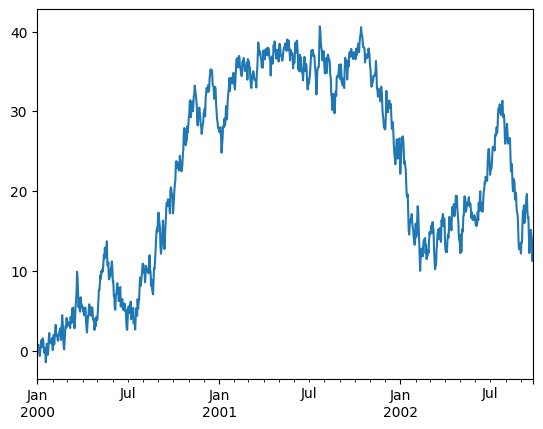

In [43]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

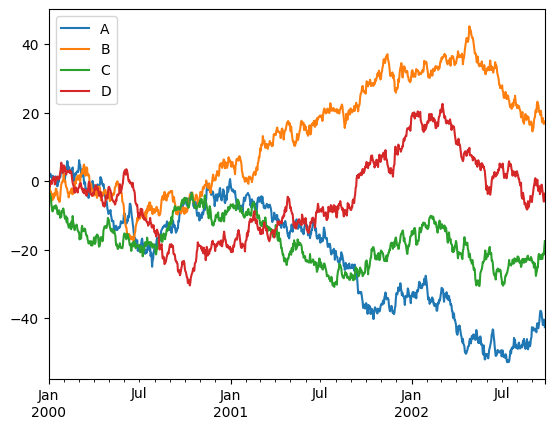

In [44]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

# Getting Data In/Out
### CSV
[Writing to a csv file](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [ ]:
df.to_csv('foo.csv')

In [ ]:
pd.read_csv('foo.csv')

# Gotchas
If you are trying an operation and you see an exception like:

In [45]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas-truth) for an explanation and what to do.
